<a href="https://colab.research.google.com/github/burhanwani/AI_homework/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [12]:
!pip install yfinance --upgrade --no-cache-dir


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [3]:
import numpy as np
from google.colab import drive

drive.mount('/content/drive',force_remount=True)









Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Modeling
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

[*********************100%***********************]  1 of 1 downloaded


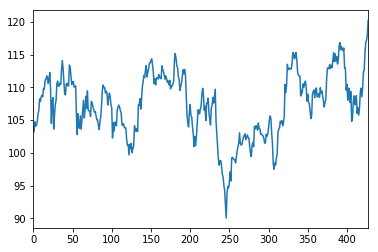

In [5]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)
df_full.head()


df_full.describe()
df_full["Adj Close"].plot()




In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:

split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [10]:
y_test.shape

(80,)

In [0]:

#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
y_pred_lag=np.roll(y_test,1)

In [13]:
get_performance(y_pred_lag)

Mean Absolute Error: 1.2771
Mean Squared Error: 3.4519
Root Mean Squared Error: 1.8579


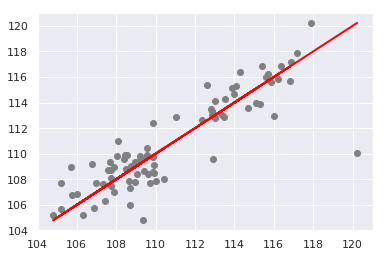

In [16]:

get_plot(y_pred_lag)

# **Linear regression Modelling**

Mean Absolute Error: 1.1876
Mean Squared Error: 2.1871
Root Mean Squared Error: 1.4789
Mean Absolute Error: 1.1876
Mean Squared Error: 2.1871
Root Mean Squared Error: 1.4789


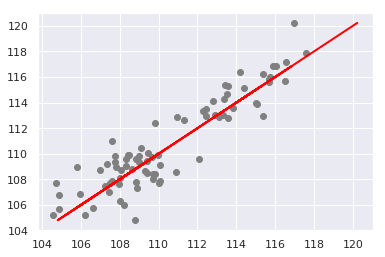

In [17]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr=model_lr.predict(x_test)
get_performance(y_pred_lr)
get_plot(y_pred_lr)
get_performance(y_pred_lr)

# Nearest Neighbour Model

Mean Absolute Error: 3.3344
Mean Squared Error: 14.1347
Root Mean Squared Error: 3.7596
Mean Absolute Error: 3.3344
Mean Squared Error: 14.1347
Root Mean Squared Error: 3.7596


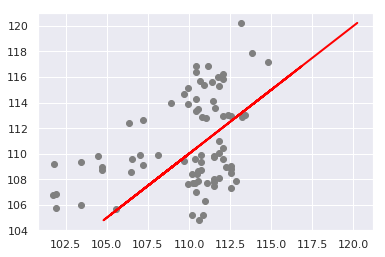

In [26]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)
y_pred_KNN=neigh.predict(x_test)
get_performance(y_pred_KNN)
get_plot(y_pred_KNN)
get_performance(y_pred_KNN)

# Comparison

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "KNN":np.absolute(y_test-y_pred_KNN)})

(9, 20)

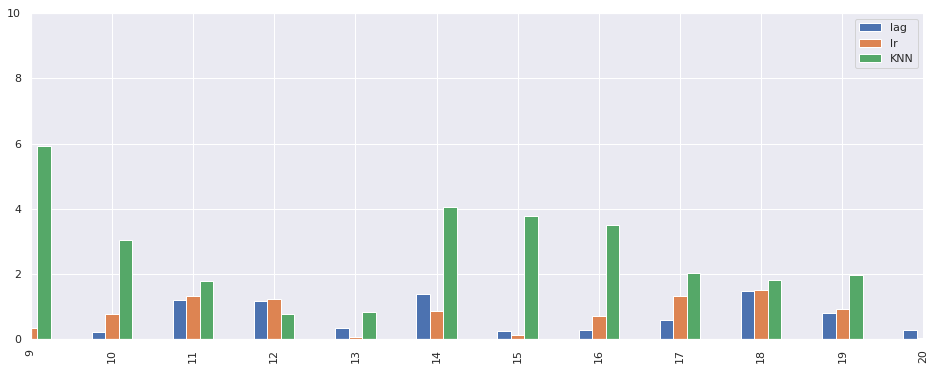

In [30]:

df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)